<a href="https://colab.research.google.com/github/alvaro-salgado/AA_MCD/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 5

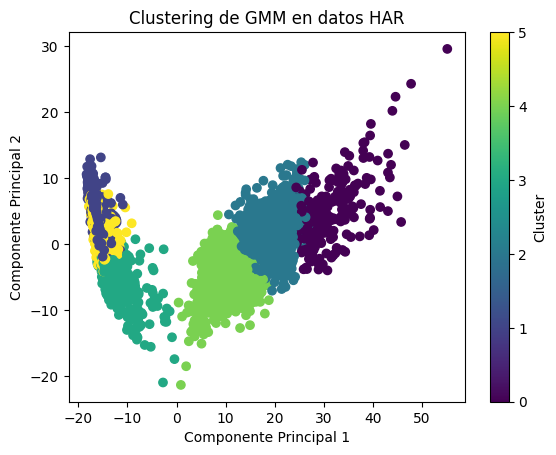

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
file_path = '/content/test.csv'
data = pd.read_csv(file_path)

# Seleccionar las características (excluyendo 'subject' y 'Activity')
X = data.drop(columns=['subject', 'Activity'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar GMM
gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(X_scaled)

# Obtener las predicciones
labels = gmm.predict(X_scaled)

# Añadir las etiquetas al conjunto de datos
data['Cluster'] = labels

# Visualizar algunos resultados (utilizando solo dos componentes principales para una visualización simplificada)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clustering de GMM en datos HAR')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


Kmeans

In [ ]:
data.Activity

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: Activity, Length: 2947, dtype: object

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
file_path = '/content/test.csv'
data = pd.read_csv(file_path)

# Seleccionar las características (excluyendo 'subject' y 'Activity')
X = data.drop(columns=['subject', 'Activity'])

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

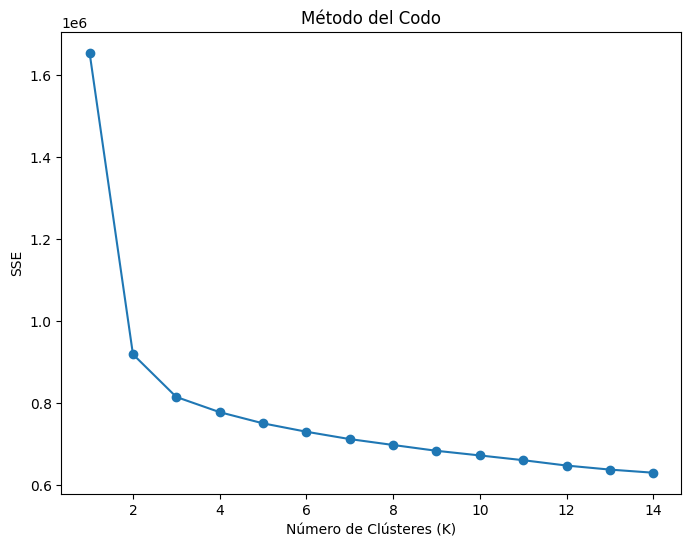

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método del codo para determinar el número de clústeres
sse = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()


In [ ]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clústeres
labels = kmeans.labels_

# Añadir las etiquetas al conjunto de datos
data['Cluster'] = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


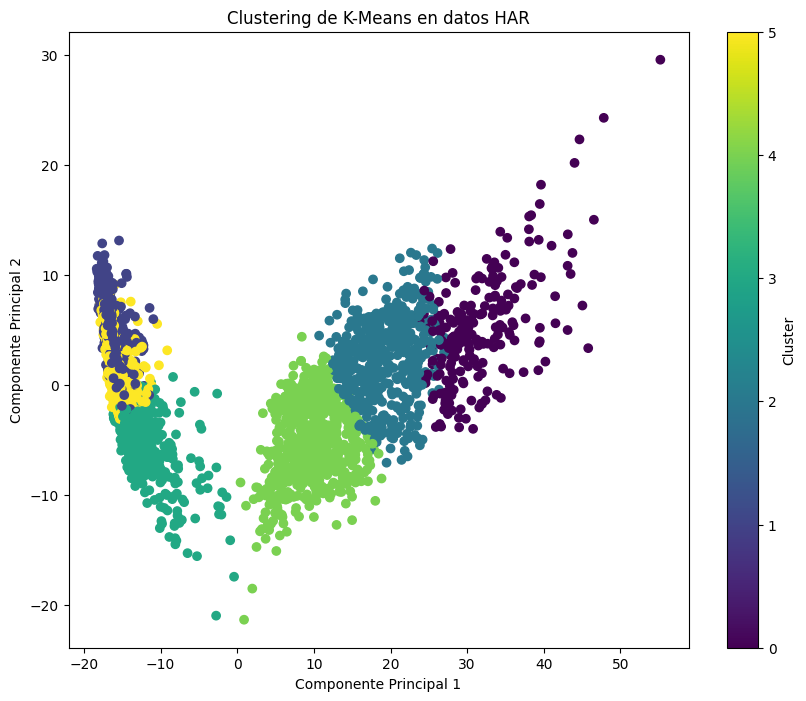

In [ ]:
from sklearn.decomposition import PCA

# Reducir las dimensiones a 2 componentes principales para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los clústeres
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clustering de K-Means en datos HAR')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


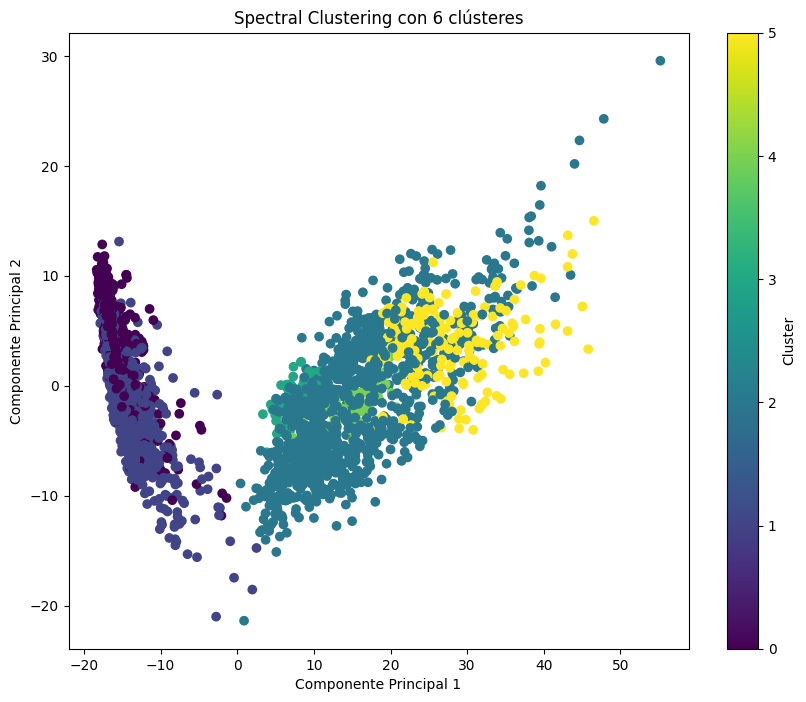

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = '/content/test.csv'
data = pd.read_csv(file_path)

# Seleccionar las características (excluyendo 'subject' y 'Activity')
X = data.drop(columns=['subject', 'Activity'])

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar Spectral Clustering
n_clusters = 6  # Asumimos que queremos encontrar 6 clústeres
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X_scaled)

# Añadir las etiquetas al conjunto de datos
data['Cluster'] = labels

# Visualizar los resultados
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Spectral Clustering con {n_clusters} clústeres')
plt.colorbar(label='Cluster')
plt.show()
